<a href="https://colab.research.google.com/github/AristidisZ/Melbourne_Tutorial_model_validation_first_model_etc/blob/main/Diamond_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import pickle
import seaborn as sns

from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure

In [ ]:
data = pd.read_csv('/content/diamonds.csv')
data.head(10)

In [ ]:
data.describe()

In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 11)

In [ ]:
data.describe()

In [ ]:
Cut = data['cut']
np.unique(Cut)

In [ ]:
sns.lmplot(x="price", y="carat", data=data);

In [ ]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
final_data = data.drop (['Unnamed: 0'],axis=1)
final_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


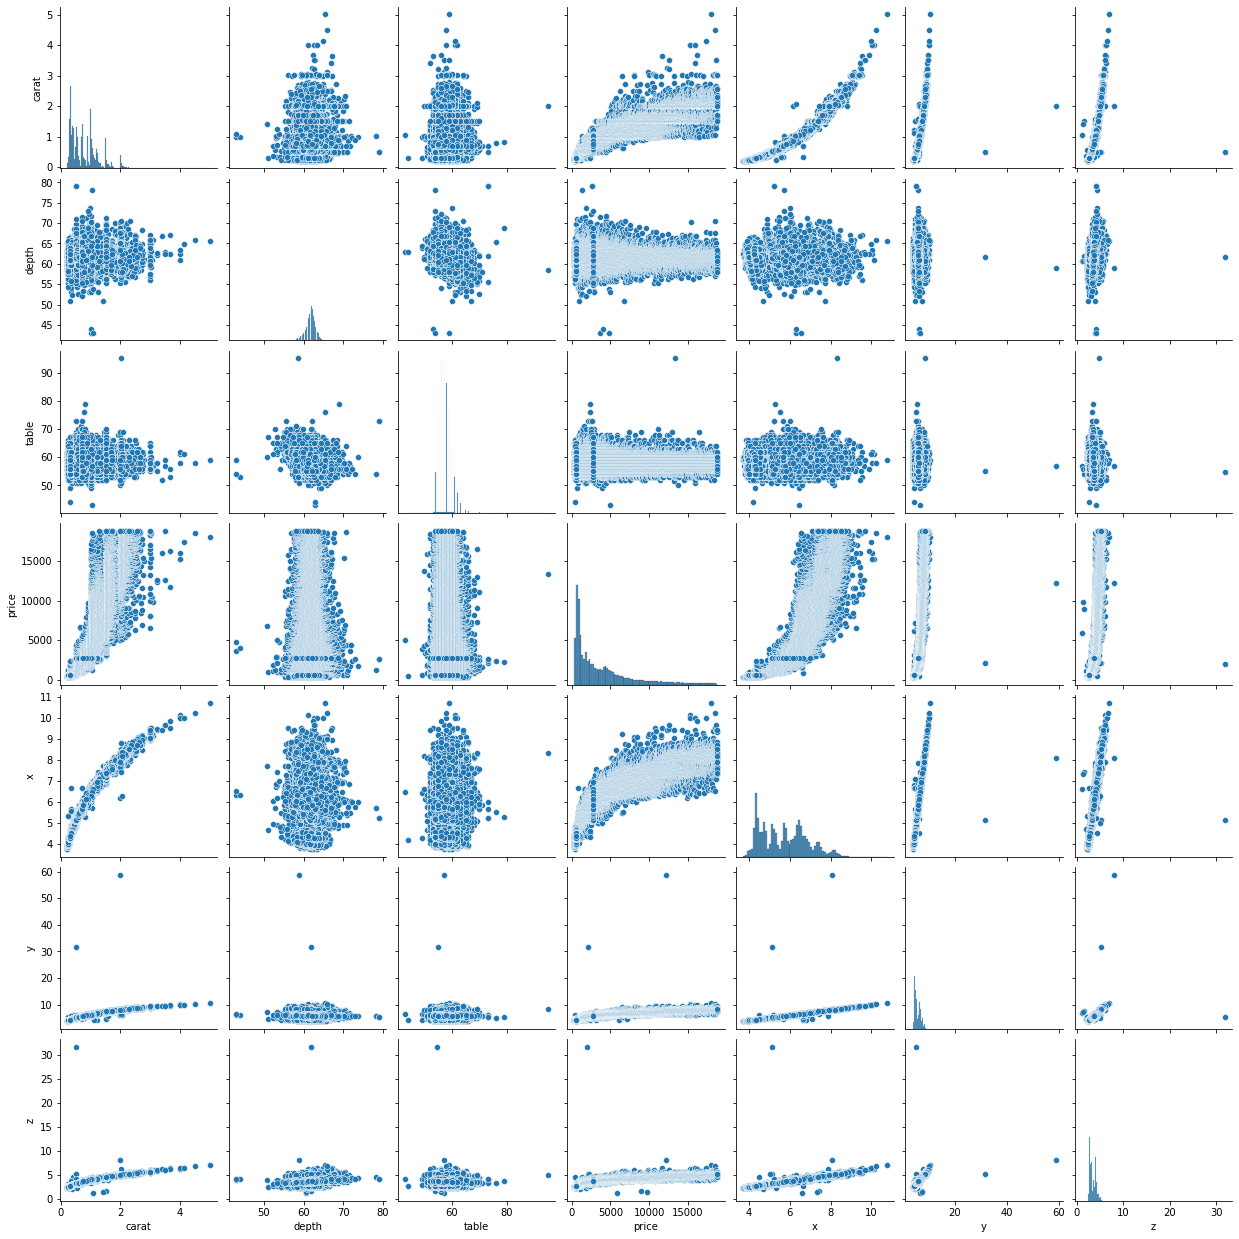

In [ ]:
sns.pairplot(final_data)

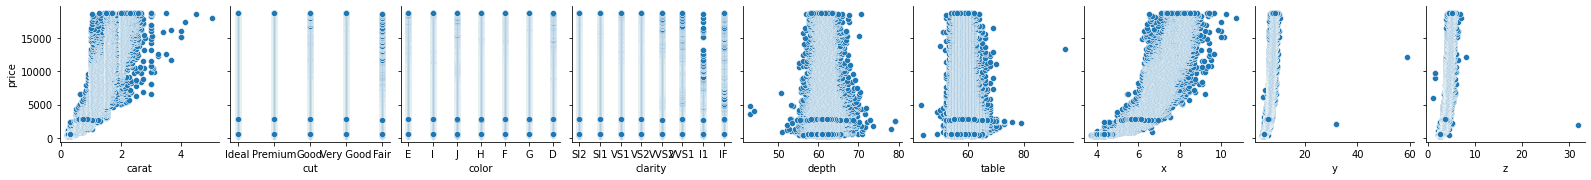

In [ ]:
sns.pairplot(final_data,x_vars=['carat','cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'],
       y_vars=['price'],)

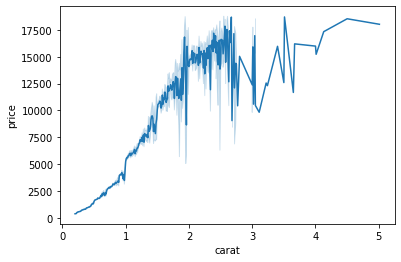

In [ ]:
sns.lineplot(data=final_data,x ='carat',y='price')

In [ ]:
final_data = pd.get_dummies(final_data , columns=['cut','color','clarity',])
final_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


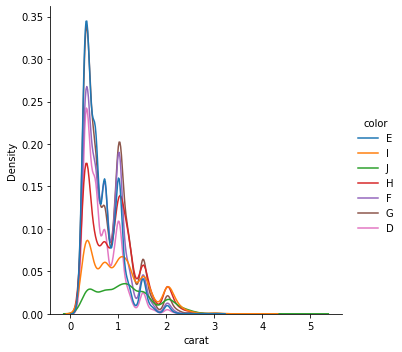

In [ ]:
sns.displot(data=final_data,x ='carat',hue='color',kind='kde')

In [ ]:
X = final_data.drop(['price'],axis=1)
y = final_data['price']

In [ ]:
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:
y.head()

0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [ ]:
y.astype(np.int64)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1 )

In [ ]:
#LinearRegression
bestLinear = 0 
for _ in range(30):
  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1 )
  linear = linear_model.LinearRegression()
  linear.fit(X_train, y_train)
  acc = linear.score(X_test, y_test)
  print(acc)

  if acc > bestLinear:
    bestLinear = acc



0.9201845317452182
0.9183903533504356
0.9173025835374445
0.9199876373900612
0.9227016606912352
0.9115305266185462
0.926024897544055
0.9192895240903091
0.9142076551025193
0.9167049909723403
0.9168682611570613
0.930629932057924
0.9145489692778183
0.9221639076003951
0.9215145261531732
0.9253027978466215
0.9210407661241307
0.921631470650792
0.9167777177733929
0.9187670121982372
0.9130260318553123
0.9208340454628456
0.9245209146502842
0.9210056939659477
0.9183686162519445
0.9228754084419214
0.9079023657656751
0.9207596773855984
0.9201437965316609
0.9146286214277709


In [ ]:
print(bestLinear)

0.9283432668011311


In [ ]:
#BayesianRidge
bestB = 0
for _ in range(30):
  X_train, X_test ,y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.1)
  clf = linear_model.BayesianRidge()
  clf.fit(X_train, y_train)
  #clf.predict(X_test , y_test)
  accB = clf.score(X_test, y_test)
  print(accB)


  if accB > bestB :
    bestB = accB
    

0.9082450784471209
0.9176763418021741
0.9205974237706274
0.9107249704082956
0.9120462565009125
0.9208627848998221
0.9213657605135877
0.9163552226881838
0.9244815793407312
0.920685728418836
0.9181669494178344
0.9169998784530866
0.9183922254374272
0.9172955032731656
0.9188389559854617
0.9185253879554313
0.9145998794855773
0.9206565856649047
0.9163082208130074
0.9304521870916653
0.9224658559352491
0.9135620043071894
0.9188263731439427
0.9198121679517973
0.9201103672100112
0.9222658595985027
0.9232904720760964
0.9175712700920664
0.9180233565869642
0.9111971261222465


In [ ]:
print(bestB)

0.9261971318078406


In [4]:
xtrain, xtest, ytrain, ytest=train_test_split(X, y, test_size=0.2)

NameError: ignored

In [ ]:
xgbr = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1,) 
print(xgbr)

XGBRegressor(objective='reg:squarederror')


In [ ]:
xgbr.fit(xtrain, ytrain)

XGBRegressor(objective='reg:squarederror')

In [ ]:
score = xgbr.score(xtrain, ytrain) 
print("Training score: ", score)


Training score:  0.9674733082290627


In [ ]:
scores = cross_val_score(xgbr, xtrain, ytrain,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())


Mean cross-validation score: 0.97


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, xtrain, ytrain, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.97


In [ ]:
ypred = xgbr.predict(xtest)
mse = mean_squared_error(ytest, ypred)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))

MSE: 514316.69
RMSE: 717.16


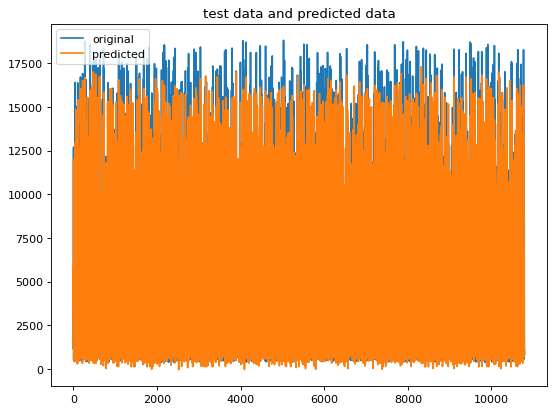

In [ ]:
x_ax = range(len(ytest))
figure(figsize=(8, 6), dpi=80)
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("test data and predicted data")
plt.legend()
plt.show()

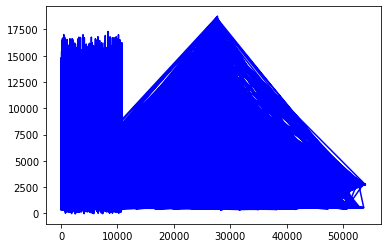

In [ ]:
x_ax1 = range(len(ypred))
plt.plot( y_test ,'-b',label='Actual') 
plt.plot( ypred ,'-b',label='predicted') 



In [ ]:
len(ypred)

10788

In [ ]:
len(ytest)

10788

In [3]:
plt.figure(figsize=(6, 10))
ax1 = sns.distplot(ytest, hist=False, color="r", label="Actual Value")
sns.distplot(ypred, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('actual vs predicted')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

NameError: ignored

<Figure size 432x720 with 0 Axes>

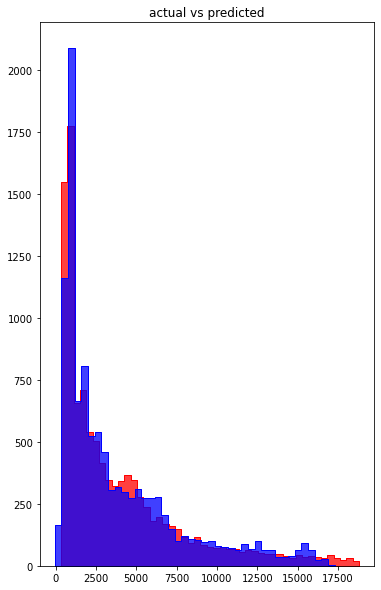

In [ ]:
plt.figure(figsize=(6, 10))
ax1 = sns.histplot(ytest,  color="r", element="step")
sns.histplot(ypred, color="b", element="step",ax=ax1)
plt.title('actual vs predicted')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(6, 10))
ax1 = sns.lineplot(ytest)
sns.lineplot(ypred, ax=ax1)
plt.title('actual vs predicted')
plt.xlabel('')
plt.ylabel('')
plt.show()
plt.close()